In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [15]:
df = pd.read_csv(r'C:\Users\Personal\OneDrive\Documents\Jupyter Notebook\Heart Disease Prediction (ML)\heart.csv',usecols=[1,4,9])
df.head()

,sex,chol,oldpeak
0,1,233,2.3
1,1,250,3.5
2,0,204,1.4
3,1,236,0.8
4,0,354,0.6


In [18]:
df.columns=['sex','chol','oldpeak']

In [19]:
df

,sex,chol,oldpeak
0,1,233,2.3
1,1,250,3.5
2,0,204,1.4
3,1,236,0.8
4,0,354,0.6
...,...,...,...
298,0,241,0.2
299,1,264,1.2
300,1,193,3.4
301,1,131,1.2


<AxesSubplot:xlabel='chol', ylabel='Density'>

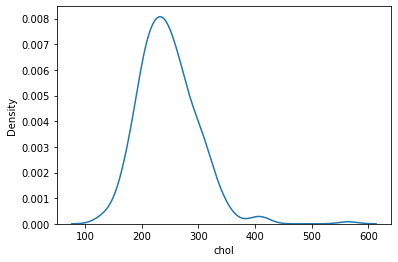

In [9]:
sns.kdeplot(df['chol'])

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

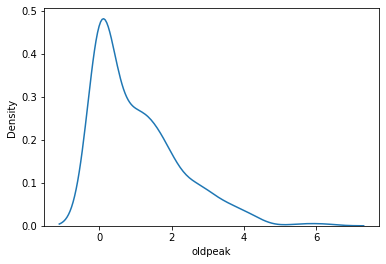

In [10]:
sns.kdeplot(df['oldpeak'])

<AxesSubplot:xlabel='chol', ylabel='oldpeak'>

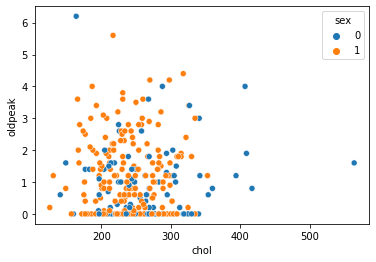

In [21]:
sns.scatterplot(df['chol'],df['oldpeak'],hue=df['sex'])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['sex'],axis=1),df, test_size=0.3,random_state=0)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
np.round(X_train_scaled.describe(),1)

,chol,oldpeak
count,212.0,212.0
mean,0.3,0.2
std,0.1,0.2
min,0.0,0.0
25%,0.2,0.0
50%,0.3,0.1
75%,0.3,0.3
max,1.0,1.0


As can be seen above:
1. The min value is 0
2. The max value is 1

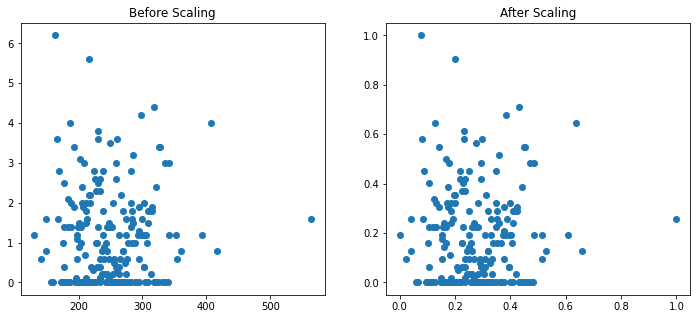

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['chol'], X_train['oldpeak'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['chol'], X_train_scaled['oldpeak'])
ax2.set_title("After Scaling")
plt.show()

No special difference in the distribution

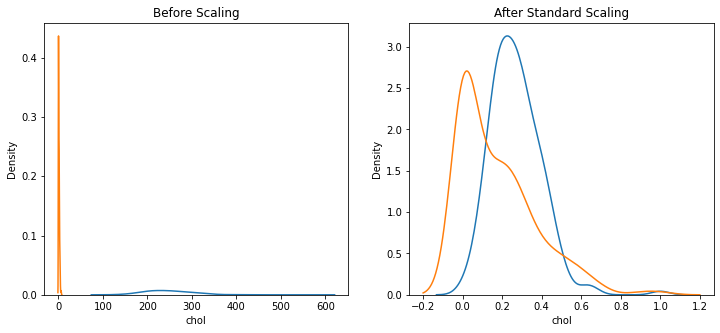

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before N')
sns.kdeplot(X_train['chol'], ax=ax1)
sns.kdeplot(X_train['oldpeak'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['chol'], ax=ax2)
sns.kdeplot(X_train_scaled['oldpeak'], ax=ax2)
plt.show()